In [15]:
# 데이터 임포트
import pandas as pd
train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/train.csv')
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/test.csv')

In [16]:
train.head(5) # 전반 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train.shape # rows, columns counts 

(891, 12)

In [18]:
# checking columns details, missing values counts 
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# selecting features 
train = train[['Survived', 'Pclass','SibSp','Parch','Fare']]

In [20]:
train

,Survived,Pclass,SibSp,Parch,Fare
0,0,3,1,0,7.2500
1,1,1,1,0,71.2833
2,1,3,0,0,7.9250
3,1,1,1,0,53.1000
4,0,3,0,0,8.0500
...,...,...,...,...,...
886,0,2,0,0,13.0000
887,1,1,0,0,30.0000
888,0,3,1,2,23.4500
889,1,1,0,0,30.0000


In [21]:
# checking na values
train.isna().sum()

Survived    0
Pclass      0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
# drop na values
# train = train.dropna() 

In [23]:
#train 훈련 검증 데이터 분류 
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2, random_state=0)

In [24]:
print(train.shape)
print(val.shape)

(712, 5)
(179, 5)


In [25]:
#타겟(y) 생존 유무 | 범주

y_train = train['Survived']

In [26]:
y_train.value_counts()

Survived
0    439
1    273
Name: count, dtype: int64

In [27]:
# y_train을 시리즈 형태로 변경
import plotly.express as px
import pandas as pd

y_train = pd.Series(y_train)

In [28]:
fig = px.histogram(y_train, x='Survived', title='Survived')

In [29]:
fig.show()

---

# LogisticRegession()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
model = LogisticRegression()

In [32]:
model.fit(train, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(val)

In [36]:
val_confusion = confusion_matrix(val, y_pred)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [37]:
# debugging val과 y_pred의 타입과 내용을 출력하여 확인하세요:
print("val:", val[:10])
print("y_pred:", y_pred[:10])
print("val type:", type(val))
print("y_pred type:", type(y_pred))


val:      Survived  Pclass  SibSp  Parch      Fare
495         0       3      0      0   14.4583
648         0       3      0      0    7.5500
278         0       3      4      1   29.1250
31          1       1      1      0  146.5208
255         1       3      0      2   15.2458
298         1       1      0      0   30.5000
609         1       1      0      0  153.4625
318         1       1      0      2  164.8667
484         1       1      1      0   91.0792
367         1       3      0      0    7.2292
y_pred: [0 0 0 1 1 1 1 1 1 1]
val type: <class 'pandas.core.frame.DataFrame'>
y_pred type: <class 'numpy.ndarray'>


In [39]:
# debugging 예상 클래스가 이진(0, 1)인지 확인하세요:
import numpy as np
print("Unique classes in val:", np.unique(val))
print("Unique classes in y_pred:", np.unique(y_pred))


Unique classes in val: [  0.       1.       2.       3.       4.       5.       6.45     6.4958
   6.75     7.0458   7.05     7.0542   7.225    7.2292   7.25     7.55
   7.65     7.7375   7.75     7.775    7.7958   7.8542   7.8958   8.05
   8.4583   8.5167   8.6542   8.6625   8.85     9.225    9.475    9.5
   9.5875   9.825    9.8375  10.4625  10.5     11.1333  11.5     12.
  12.475   12.525   12.65    13.      14.      14.4542  14.4583  14.5
  15.05    15.2458  15.5     15.85    15.9     19.2583  20.25    21.
  21.075   23.      23.25    24.15    25.9292  26.      26.25    26.55
  27.7208  27.9     29.125   29.7     30.      30.5     31.      31.275
  33.      35.5     36.75    39.6     39.6875  46.9     52.      55.
  56.4958  57.9792  59.4     63.3583  71.2833  73.5     76.7292  77.9583
  78.2667  79.2     79.65    82.1708  83.1583  83.475   90.      91.0792
 108.9    113.275  120.     134.5    146.5208 151.55   153.4625 164.8667
 227.525  247.5208 262.375  263.    ]
Unique classes 

In [40]:
y_pred = pd.Series(y_pred)

In [41]:
val_confusion = confusion_matrix(val, y_pred)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [45]:
# debugging 3. val과 y_pred의 고유값 확인 val과 y_pred의 고유값이 서로 일치하는지 확인합니다:
import numpy as np

print("val 고유값:", np.unique(val['Survived']))
print("y_pred 고유값:", np.unique(y_pred))


val 고유값: [0 1]
y_pred 고유값: [0 1]


In [46]:
val_confusion = confusion_matrix(val['Survived'], y_pred)

In [47]:
val_confusion

array([[110,   0],
       [  0,  69]], dtype=int64)

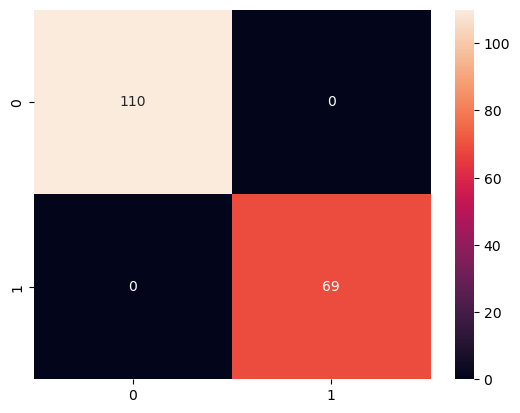

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(val_confusion, annot=True, fmt='d')
plt.show()

혼동행렬(confusion matrix)을 사용하여 분류 모델의 성능을 분석할 때, 각 항목이 무엇을 의미하는지 이해하는 것이 중요합니다. 주어진 혼동행렬:

```
array([[110,   0],
       [  0,  69]], dtype=int64)
```

이 혼동행렬은 이진 분류 모델의 결과를 나타냅니다. 각 항목은 다음과 같이 해석됩니다:

1. **True Positive (TP)**: 모델이 양성 클래스를 정확히 예측한 경우 (값: 69)
2. **False Positive (FP)**: 모델이 음성 클래스를 잘못 양성 클래스로 예측한 경우 (값: 0)
3. **False Negative (FN)**: 모델이 양성 클래스를 잘못 음성 클래스로 예측한 경우 (값: 0)
4. **True Negative (TN)**: 모델이 음성 클래스를 정확히 예측한 경우 (값: 110)

이 혼동행렬을 바탕으로 다양한 성능 지표를 계산할 수 있습니다. 주요 지표들은 다음과 같습니다:

### 1. 정확도 (Accuracy)
모델이 정확하게 예측한 비율입니다.
\[
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\]
\[
\text{Accuracy} = \frac{69 + 110}{69 + 110 + 0 + 0} = \frac{179}{179} = 1.0
\]
정확도는 100%입니다.

### 2. 정밀도 (Precision)
모델이 양성 클래스를 예측한 것 중에서 실제 양성 클래스의 비율입니다.
\[
\text{Precision} = \frac{TP}{TP + FP}
\]
\[
\text{Precision} = \frac{69}{69 + 0} = 1.0
\]
정밀도는 100%입니다.

### 3. 재현율 (Recall) 또는 민감도 (Sensitivity)
모델이 실제 양성 클래스를 예측한 비율입니다.
\[
\text{Recall} = \frac{TP}{TP + FN}
\]
\[
\text{Recall} = \frac{69}{69 + 0} = 1.0
\]
재현율은 100%입니다.

### 4. F1-Score
정밀도와 재현율의 조화 평균입니다.
\[
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\]
\[
\text{F1-Score} = 2 \times \frac{1.0 \times 1.0}{1.0 + 1.0} = 1.0
\]
F1-Score는 100%입니다.

### 결론:
이 모델은 모든 예측에서 정확하게 양성과 음성 클래스를 구분하고 있기 때문에 **정확도**, **정밀도**, **재현율**, **F1-Score** 모두 100%입니다. 이는 모델이 완벽하게 작동하고 있음을 의미합니다.